In [ ]:
import pandas as pd

# Specify Paths for data
BASE_PATH = 'data/'
TRAIN_PATH = BASE_PATH + 'train.csv'
TEST_PATH = BASE_PATH + 'test.csv'

In [ ]:
# Load in training data
train_df = pd.read_csv(TRAIN_PATH)

In [ ]:
# Exploratory Data Analysis (EDA)
# Check out a few rows in the training data
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Each row contains 784 pixels, flattened from a 28 x 28 image

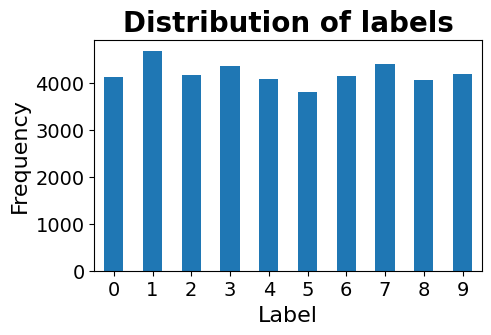

In [ ]:
# Visualize target distribution
import matplotlib.pyplot as plt

train_df['label'].value_counts().sort_index().plot(kind='bar', figsize=(5, 3), rot=0)
plt.title('Distribution of labels', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Label', fontsize=16)
plt.ylabel('Frequency', fontsize=16);

In [ ]:
# Prepare features for training: for a simple baseline model, each pixel is a feature
features = [col for col in train_df.columns if col.startswith('pixel')]

# Features and the target
X = train_df[features]
y = train_df['label']

In [ ]:
# Let's check the range of pixel values
X.values.min(), X.values.max()

(0, 255)

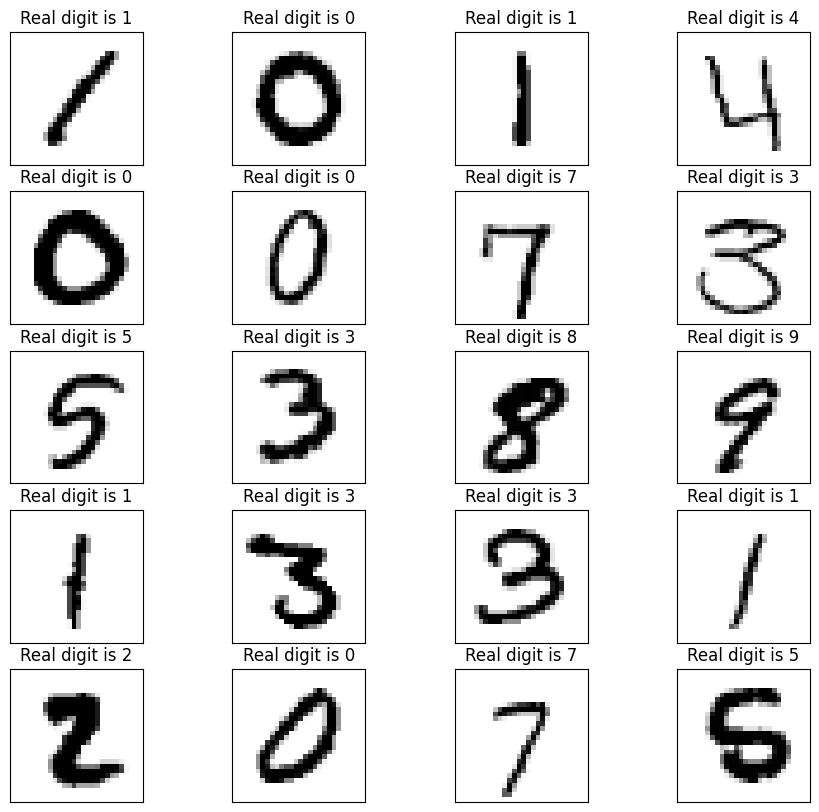

In [ ]:
# Visualize some digits
fig, axis = plt.subplots(5, 4, figsize=(11, 10))

for i, ax in enumerate(axis.flat):
    ax.imshow(X.values[i].reshape(28,28), cmap='binary')
    ax.set(title = "Real digit is {}".format(y.values[i]))
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
# Randomly exclude 25% data from training for validation
# Set random seed to 1 for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

# Train a decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10, random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [ ]:
# Evaluate the decision tree model
train_preds = dtc.predict(X_train)
val_preds = dtc.predict(X_val)

In [ ]:
# Check model accuracy
import numpy as np
from sklearn.metrics import accuracy_score

def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    return round(accuracy_score(y_true, y_pred) * 100, 2)

acc_train = acc(train_preds, y_train)
acc_val = acc(val_preds, y_val)

print(f'Training accuracy for our baseline (using all pixel features): {acc_train}%')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_val}%')

Training accuracy for our baseline (using all pixel features): 90.57%
Validation accuracy for our baseline (using all pixel features): 85.12%


In [ ]:
# Visualize our baseline decision tree model

import pydotplus
import matplotlib
import matplotlib.pyplot as plt
from six import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Save PNG file
graph.write_png("decision_tree_baseline.png");

In [ ]:
test_df = pd.read_csv(TEST_PATH)
test_preds = dtc.predict(test_df[features])

In [1]:
test_preds

NameError: ignored